# Comment Toxicity


In [ ]:
import os  # Importing the os module for interacting with the operating system
import pandas as pd  # Importing pandas library for data manipulation and analysis
import tensorflow as tf  # Importing TensorFlow library for machine learning tasks
import numpy as np  # Importing numpy library for numerical computing


In [ ]:

df = pd.read_csv("train.csv")  #Reading the data from a CSV file named "train.csv" into a pandas DataFrame 'df'


In [ ]:
df.head() # Displaying the first few rows of the DataFrame 'df' to get an initial understanding of the data structure and content

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  00025465d4725e87  ...             0
3  0002bcb3da6cb337  ...             0
4  00031b1e95af7921  ...             0

[5 rows x 8 columns]

## Text Vectorization


In [ ]:
from tensorflow.keras.layers import TextVectorization # Importing TextVectorization layer from TensorFlow's Keras API for text preprocessing and vectorization


In [ ]:
X = df['comment_text'] # Assigning the 'comment_text' column from the DataFrame 'df' to variable X, representing input data
y = df[df.columns[2:]].values  # Assigning values of the columns starting from the third column (index 2) to variable y, representing target labels


In [ ]:
df.columns #Displays all the columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
MAX_FEATURES = 200000 # Setting the maximum number of features for text vectorization to 200,000

In [ ]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES, # Creating a TextVectorization layer with a maximum vocabulary size set to MAX_FEATURES
                               output_sequence_length=1800, # Specifying the maximum length of the output sequences to 1800 tokens
                               output_mode = 'int') # Configuring the output mode of the vectorizer to produce integer-encoded sequences

In [ ]:
vectorizer.adapt(X.values) # Adapting the TextVectorization layer to the input data X by learning the vocabulary and fitting tokenizer

In [ ]:
vectorizer('hi this is working good')[:5] # Applying the TextVectorization layer to tokenize and encode the input text 'hi this is working good', and displaying the first 5 tokens

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([171,  14,   9, 585,  98])>

In [ ]:
vectorizer_text = vectorizer(X.values)  # Applying the TextVectorization layer to the entire input data X to tokenize and encode each text sample

In [ ]:
len(X) # Obtaining the length of the input data X, which represents the number of samples in the dataset


159568

In [ ]:
vectorizer_text # This variable holds the tokenized and encoded representations of the entire input data X, obtained by applying the TextVectorization layer

<tf.Tensor: shape=(159568, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [ 2522,    31,    36, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text,y)) # Creating a TensorFlow Dataset from the tokenized text data and target labels
dataset = dataset.cache() # Caching the dataset to improve training performance by storing it in memory
dataset = dataset.shuffle(16000) # Shuffling the dataset to introduce randomness and avoid model overfitting
dataset = dataset.batch(16)   # Creating batches of 16 samples for training efficiency
dataset = dataset.prefetch(8) # Prefetching data to overlap data preprocessing and model execution


In [ ]:
batch_X, batch_y = dataset.as_numpy_iterator().next() # Extracting a batch of input data and target labels from the dataset as NumPy arrays

2024-01-30 07:44:57.741035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 07:44:57.741555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 07:44:57.844454: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an inp

In [ ]:
batch_X.shape

(16, 1800)

In [ ]:
batch_y.shape

(16, 6)

In [ ]:
train = dataset.take(int(len(dataset)*.7))  # Creating a training subset containing 70% of the dataset
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # Creating a validation subset containing 20% of the dataset, skipping the first 70%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # Creating a test subset containing 10% of the dataset, skipping the first 90%

In [ ]:
train_generator = train.as_numpy_iterator() # Creating a generator from the training subset of the dataset to iterate over batches as NumPy arrays


2024-01-30 07:44:58.624872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 07:44:58.625297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159568,1800]
	 [[{{node Placeholder/_0}}]]


In [ ]:
train_generator.next() # Fetching the next batch of data from the training generator to use for model training



(array([[   8,  524,  199, ...,    0,    0,    0],
        [ 124,    7,   37, ...,    0,    0,    0],
        [ 218,   19,    3, ...,    0,    0,    0],
        ...,
        [  67,  185,   10, ...,    0,    0,    0],
        [ 202, 1042, 1218, ...,    0,    0,    0],
        [ 425, 1486, 1495, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]]))

In [ ]:
from tensorflow.keras.models import Sequential # Importing the Sequential model from TensorFlow's Keras API for building sequential neural networks

from tensorflow.keras.layers import Embedding, LSTM, Dropout,Bidirectional, Dense # Importing various layers from TensorFlow's Keras API for constructing the model architecture

In [ ]:
model = Sequential()  # Initializing a Sequential model for building the neural network architecture
model.add(Embedding(MAX_FEATURES + 1, 32))  # Adding an Embedding layer with vocabulary size of MAX_FEATURES+1 and embedding dimensionality of 32
model.add(Bidirectional(LSTM(32, activation='tanh')))  # Adding a Bidirectional LSTM layer with 32 units and tanh activation function
model.add(Dense(128, activation='relu'))  # Adding a Dense layer with 128 units and ReLU activation function
model.add(Dense(256, activation='relu'))  # Adding a Dense layer with 256 units and ReLU activation function
model.add(Dense(128, activation='relu'))  # Adding a Dense layer with 128 units and ReLU activation function
model.add(Dense(6, activation='sigmoid'))  # Adding a Dense output layer with 6 units and sigmoid activation function for multi-label classification


2024-01-30 07:44:59.077260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-30 07:44:59.078886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-30 07:44:59.079781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')  # Compiling the model with Binary Cross-Entropy loss function and Adam optimizer


In [ ]:
model.summary()  # Displaying a summary of the model architecture, including the layers, output shapes, and number of parameters


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [ ]:
history = model.fit(train, epochs=1, validation_data=val)  # Training the model for one epoch using the training dataset 'train' and validating on the validation dataset 'val'


2024-01-30 07:44:59.541920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-30 07:44:59.543115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-30 07:44:59.543947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6980/6981 [============================>.] - ETA: 0s - loss: 0.0625

2024-01-30 08:44:35.075341: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


6981/6981 [==============================] - ETA: 0s - loss: 0.0625

2024-01-30 08:44:36.271696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 08:44:36.272646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 08:44:36.548331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split

6981/6981 [==============================] - 3699s 530ms/step - loss: 0.0625 - val_loss: 0.0485


In [ ]:
history.history  # Accessing the history dictionary containing training and validation metrics from the training process


{'loss': [0.06245957314968109], 'val_loss': [0.04853491485118866]}

In [ ]:
from matplotlib import pyplot as plt  # Importing pyplot module from Matplotlib library for data visualization


<Figure size 800x500 with 0 Axes>

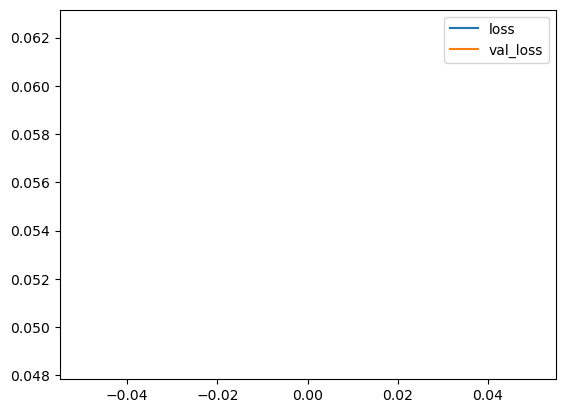

In [ ]:
plt.figure(figsize=(8, 5))  # Creating a new figure with a specified size for better visualization
pd.DataFrame(history.history).plot()  # Plotting the training and validation metrics from the training history stored in the 'history' object as a pandas DataFrame
plt.show()  # Displaying the plot


In [ ]:
text = vectorizer('You freaking Suck')  # Tokenizing and encoding the input text 'You freaking Suck' using the TextVectorization layer


In [ ]:
np.expand_dims(text, 0)  # Adding an extra dimension to the tokenized and encoded text to make it compatible with model input


array([[   7, 7158,  397, ...,    0,    0,    0]])

In [ ]:
model.predict(np.expand_dims(text, 0))  # Making predictions on the tokenized and encoded text using the trained model


2024-01-30 08:46:38.958820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-30 08:46:38.960077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-30 08:46:38.960872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 492ms/step


array([[0.9896218 , 0.23785692, 0.9245831 , 0.04551519, 0.82300454,
        0.1425346 ]], dtype=float32)

In [ ]:
df.columns[2:]  # Accessing columns starting from the third column onwards in the DataFrame 'df'


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch = test.as_numpy_iterator().next()  # Fetching a batch of data from the test dataset as NumPy arrays


2024-01-30 08:46:39.965793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 08:46:39.966170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159568,1800]
	 [[{{node Placeholder/_0}}]]


In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()  # Extracting a batch of input data and target labels from the test dataset as NumPy arrays


In [ ]:
batch_y  # Variable containing the target labels for the batch of data extracted from the test dataset


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [ ]:
res = model.predict(np.expand_dims(text, 0))  # Making predictions on the tokenized and encoded text using the trained model


In [ ]:
(model.predict(batch_X) > 0.5).astype(int)  # Thresholding model predictions to binary values (0 or 1) based on a threshold of 0.5


1/1 [==============================] - 0s 78ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy  # Importing metrics from TensorFlow's Keras API for model evaluation


In [ ]:
pre = Precision()  # Initializing Precision metric object for evaluating model precision
re = Recall()  # Initializing Recall metric object for evaluating model recall
acc = CategoricalAccuracy()  # Initializing CategoricalAccuracy metric object for evaluating model accuracy


In [ ]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch  # Extracting input data and true labels from the current batch
    y_pred = model.predict(X_true)  # Making predictions on the input data using the trained model

    y_true = y_true.flatten()  # Flattening true labels for compatibility with metric calculations
    y_pred = y_pred.flatten()  # Flattening predicted labels for compatibility with metric calculations

    pre.update_state(y_true, y_pred)  # Updating Precision metric state with true and predicted labels
    re.update_state(y_true, y_pred)  # Updating Recall metric state with true and predicted labels
    acc.update_state(y_true, y_pred)  # Updating CategoricalAccuracy metric state with true and predicted labels


1/1 [==============================] - 0s 74ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')  # Printing the calculated Precision, Recall, and Accuracy metrics


Precision: 0.7842938899993896,Recall:0.676846981048584Accuracy:0.47241726517677307


In [ ]:
model.save('toxicity.h5')  # Saving the trained model to a file named 'toxicity.h5' for future use or deployment


In [ ]:
test_str = vectorizer("I hate you! ill get you for the shit you have done")  # Tokenizing and encoding a test string using the TextVectorization layer


In [ ]:
df.columns[2:]  # Accessing columns starting from the third column onwards in the DataFrame 'df'


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
model.predict(np.expand_dims(test_str, 0))  # Making predictions on the tokenized and encoded test string using the trained model


1/1 [==============================] - 0s 120ms/step


array([[0.98259026, 0.2454473 , 0.90025824, 0.05993592, 0.80067647,
        0.15936844]], dtype=float32)

In [ ]:
def score_comment(comment):
    # Vectorizing the input comment
    vectorized_comment = vectorizer([comment])
    
    # Making predictions on the vectorized comment using the trained model
    results = model.predict(vectorized_comment)
    
    # Initializing an empty string to store the results
    text = ''
    
    # Looping over each toxicity label and its corresponding prediction
    for idx, col in enumerate(df.columns[2:]):
        # Appending the label and prediction result to the text string
        text += '{}: {}  '.format(col, results[0][idx] > 0.5)
        
    # Returning the text string containing the results
    return text


In [ ]:
score_comment("i will kill you")



1/1 [==============================] - 0s 64ms/step
            

'toxic: True  severe_toxic: False  obscene: True  threat: False  insult: False  identity_hate: False  '